# Fit LIF model to BBP data

### Load modules

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle

from Experiment import Experiment
from LIF import LIF
from Filter_Rect_LogSpaced import Filter_Rect_LogSpaced

plt.style.use('ggplot')
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.facecolor'] = 'white'

root_path = './full_dataset/article_4_data/grouped_ephys/'
figures_path = './results/figures/raw_data/full_dataset'
expm_path = './results/experiments/'

dirs = sorted(os.listdir(root_path))
animalset = np.arange(0,len(dirs))

### Load experiments

In [2]:
def open_filterd_list(filtername):
    with open('/home/andrej/Dropbox/Arbeit/MKP/gif_fitting/BlueBrain/' + filtername + '_infos.pkl', 'rb') as f:
        filtered_list = pickle.load(f)
    return filtered_list
    
soms = open_filterd_list('som_animals')
vips = open_filterd_list('vip_animals')
pvs = open_filterd_list('pv_animals')

FileNotFoundError: [Errno 2] No such file or directory: '/home/andrej/Dropbox/Arbeit/MKP/gif_fitting/BlueBrain/som_animals_infos.pkl'

In [3]:
cell_names = list(vips.keys())
expms = []

for i in range(len(vips)):
    current_expm_name = 'Experiment_Cell_' + cell_names[i] + '_merged_idrest_traces.pkl'
    current_expm_path = os.path.join(expm_path,current_expm_name)
    try:
        current_expm = Experiment.load(current_expm_path)
        expms.append(current_expm)
    except:
        pass

NameError: name 'vips' is not defined

In [4]:
len(expms)

NameError: name 'expms' is not defined

### Fit models

In [5]:
my_expm = expms[0]

mylif = LIF(my_expm.dt)

mylif.Tref = 4.0
my_expm.detectSpikes_cython()
mylif.fitVoltageReset(my_expm,4.0)
tr = my_expm.trainingset_traces[0]

NameError: name 'expms' is not defined

In [6]:
for expm in expms:
    mylif = LIF(expm.dt)
    mylif.Tref = 4.0
    expm.detectSpikes_cython()
    print(expm.name)
    mylif.fitVoltageReset(expm,4.0)

Detect spikes!
Done!
Cell_A97_merged_idrest_traces
Detect spikes!
Done!
Cell_B89_merged_idrest_traces
Detect spikes!
Done!
Cell_A90_merged_idrest_traces
Detect spikes!
Done!
Cell_A87_merged_idrest_traces
Detect spikes!
Done!
Cell_BET17_merged_idrest_traces
Detect spikes!
Done!
Cell_E45_merged_idrest_traces
Detect spikes!
Done!
Cell_B76_merged_idrest_traces
Detect spikes!
Done!
Cell_B42_merged_idrest_traces
Detect spikes!
Done!
Cell_A65_merged_idrest_traces
Detect spikes!
Done!
Cell_A81_merged_idrest_traces
Detect spikes!
Done!
Cell_B20_merged_idrest_traces
Detect spikes!
Done!
Cell_DALET59_merged_idrest_traces


/home/andrej/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


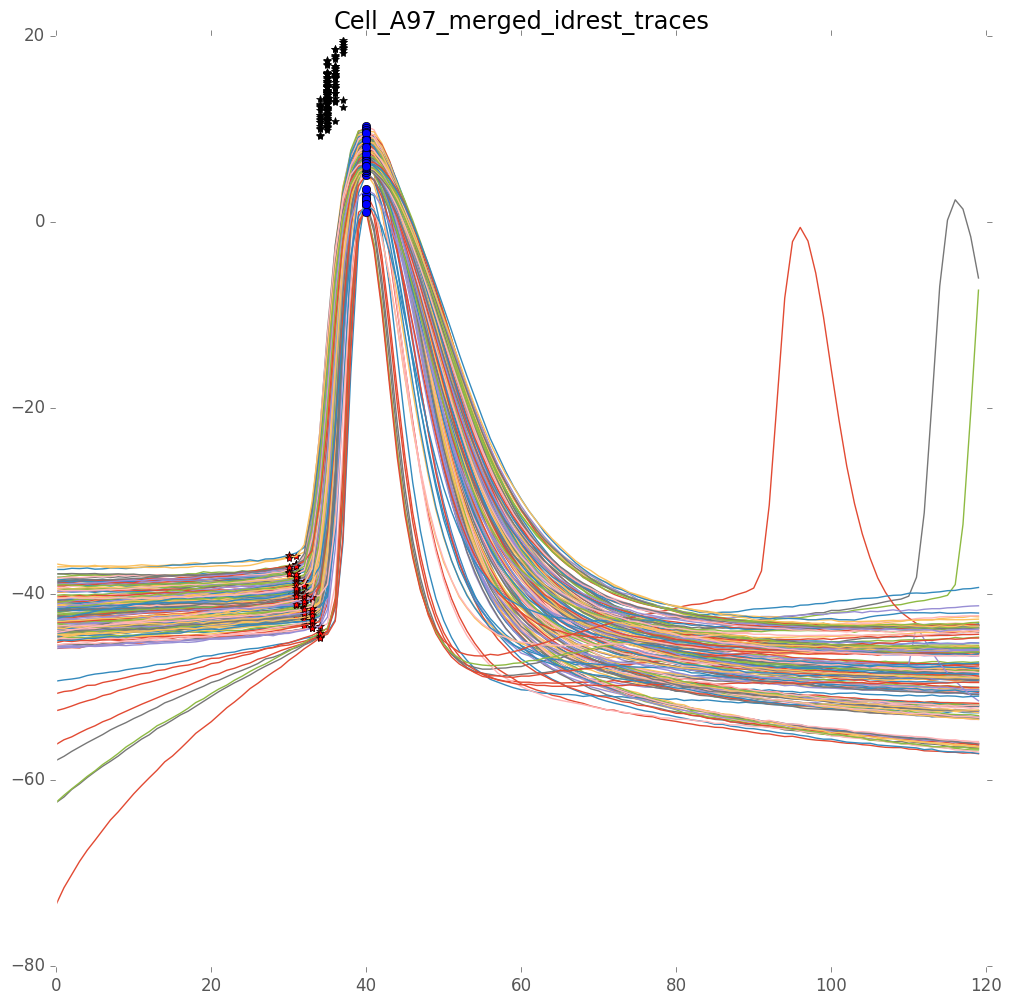

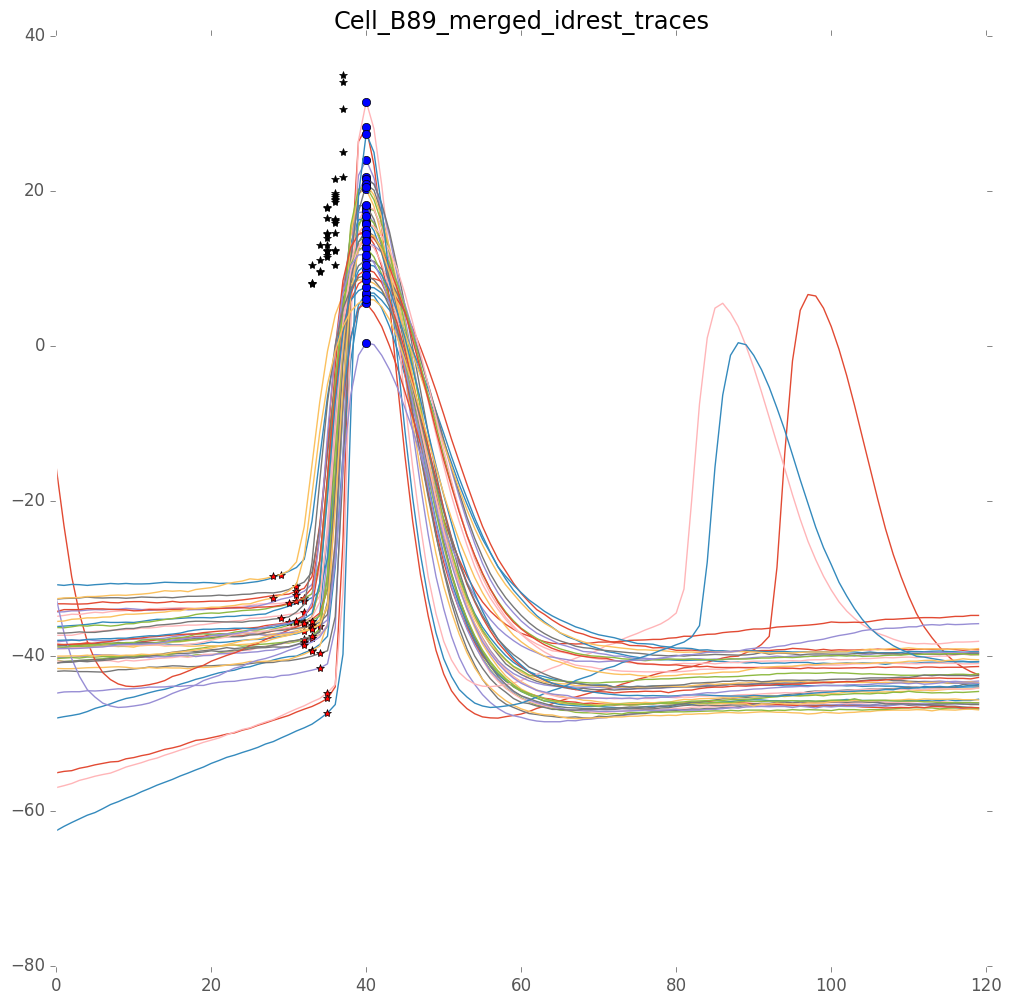

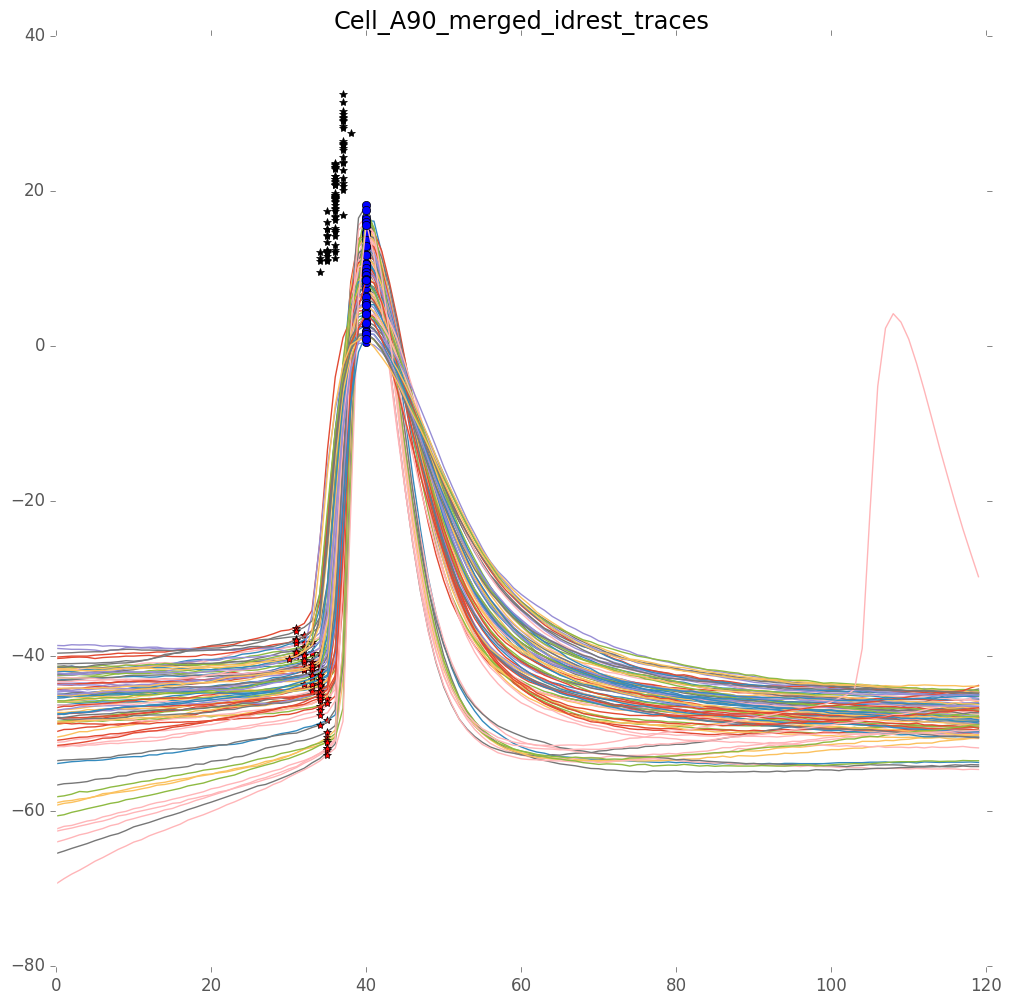

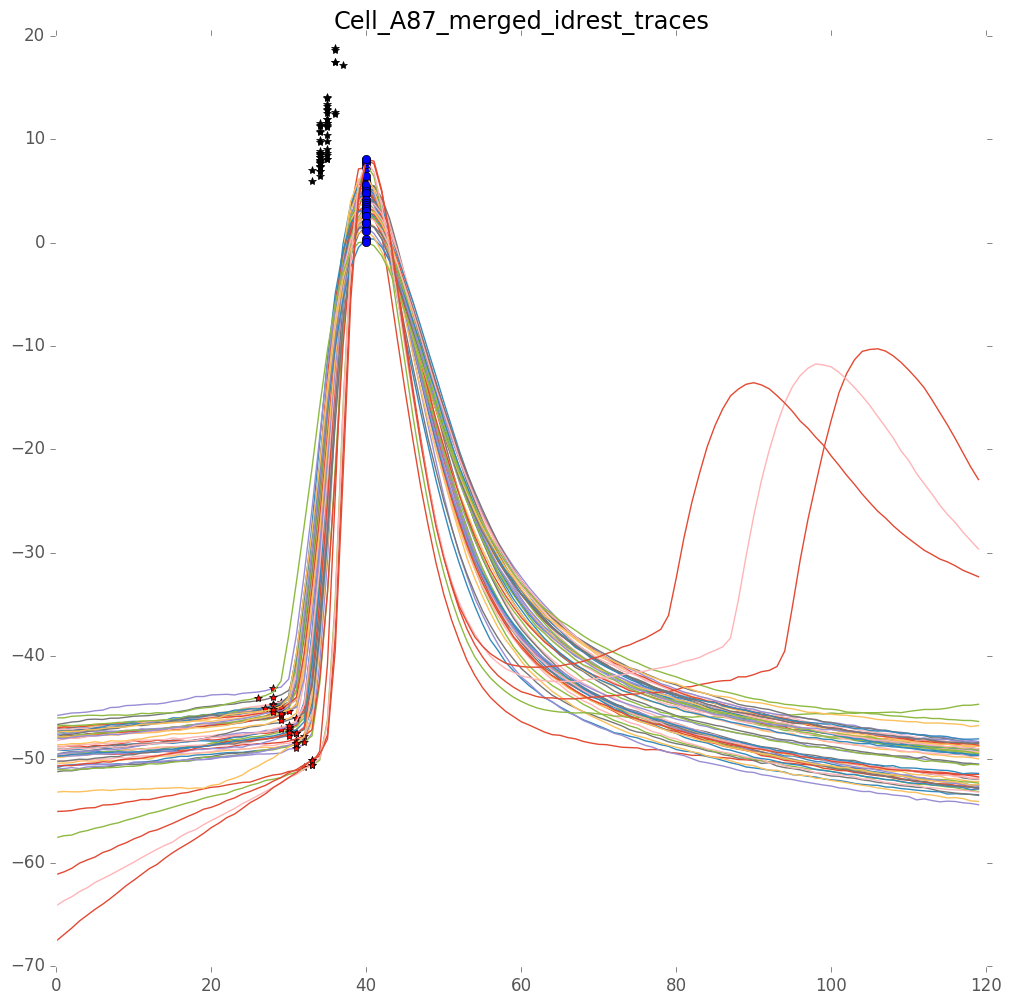

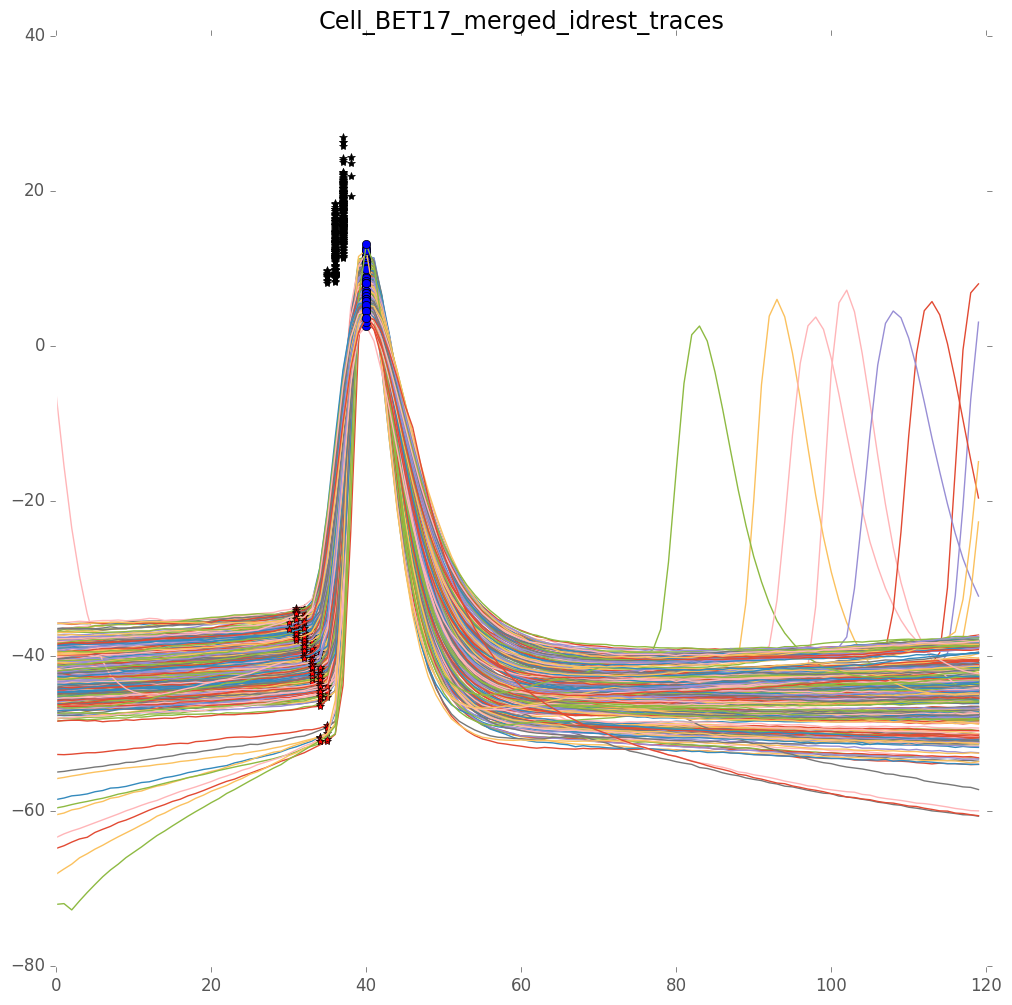

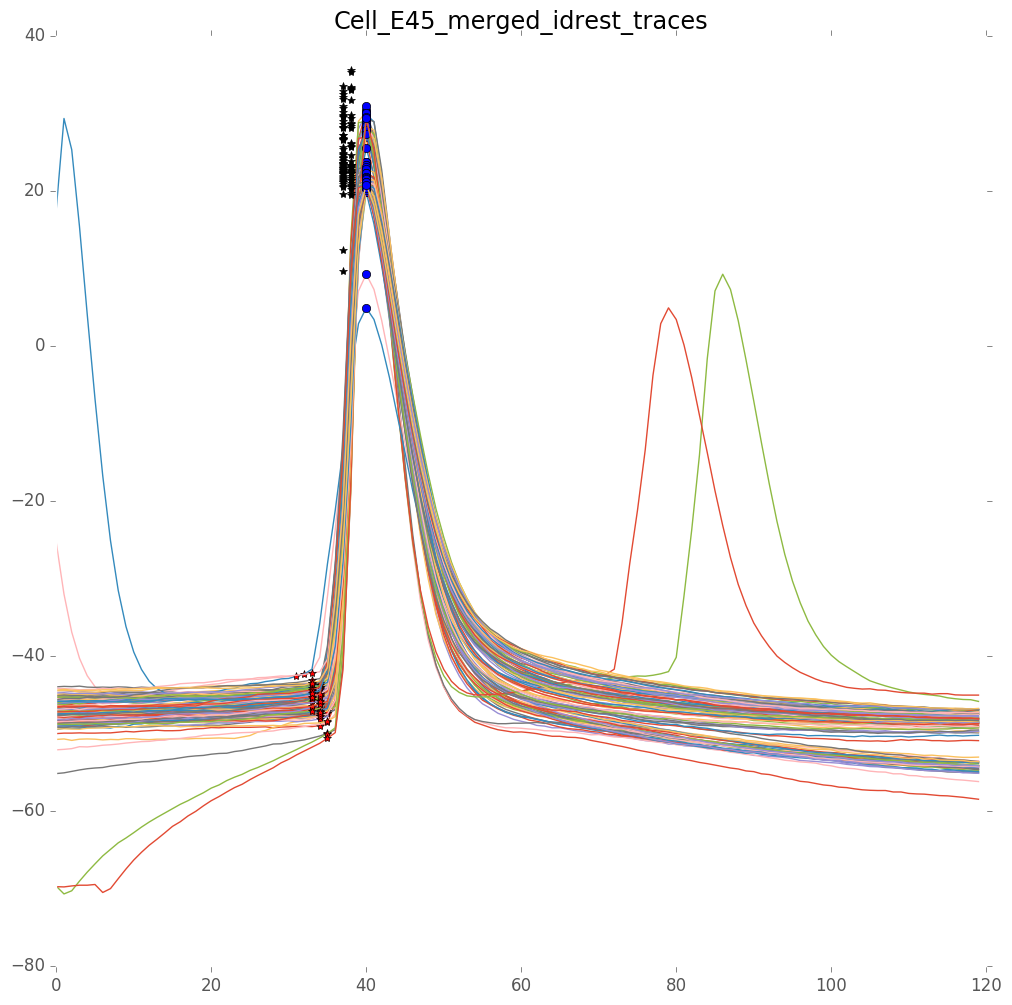

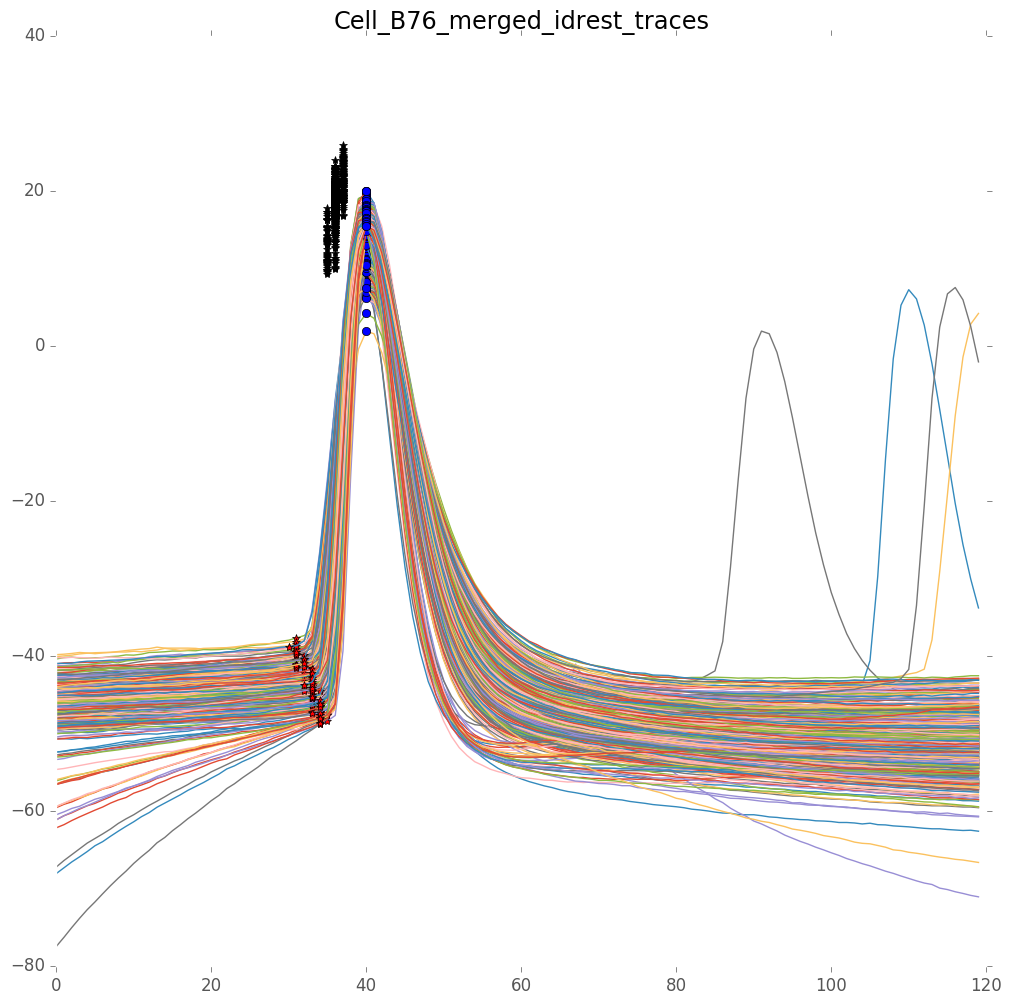

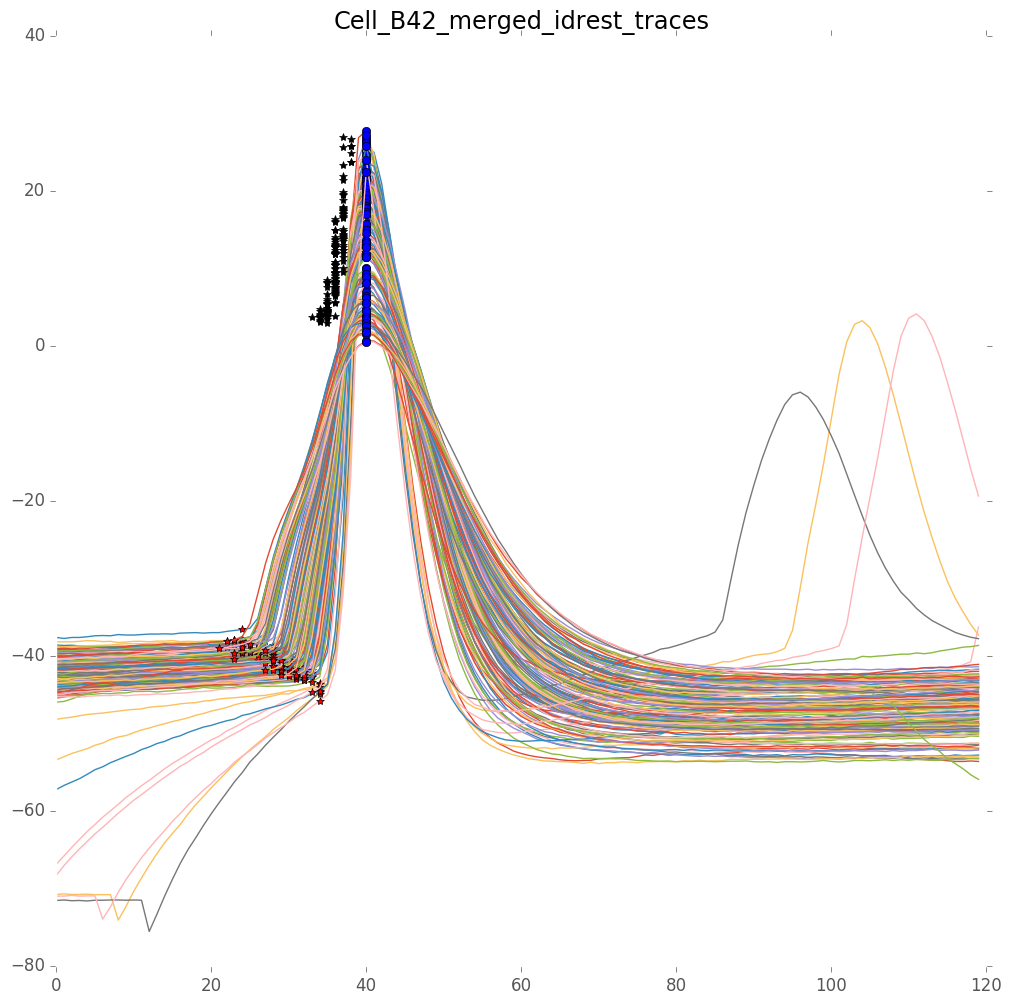

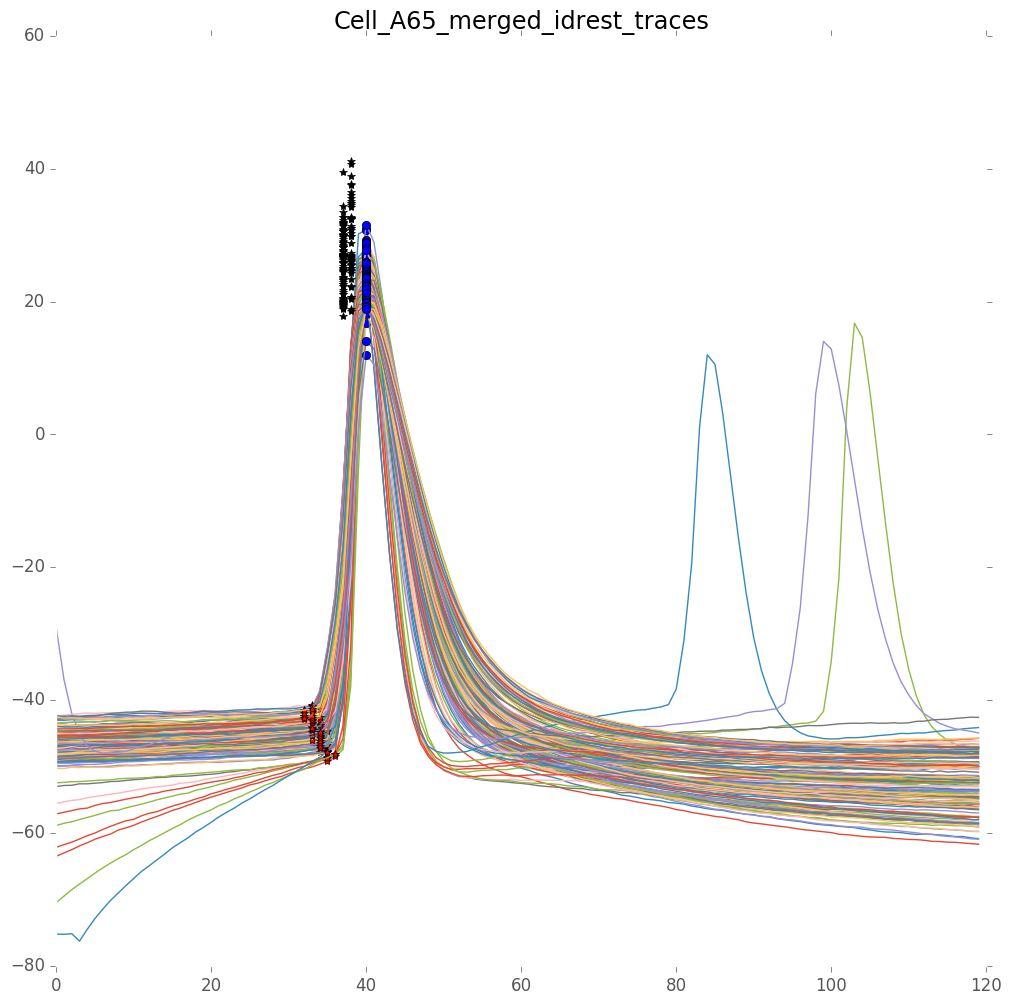

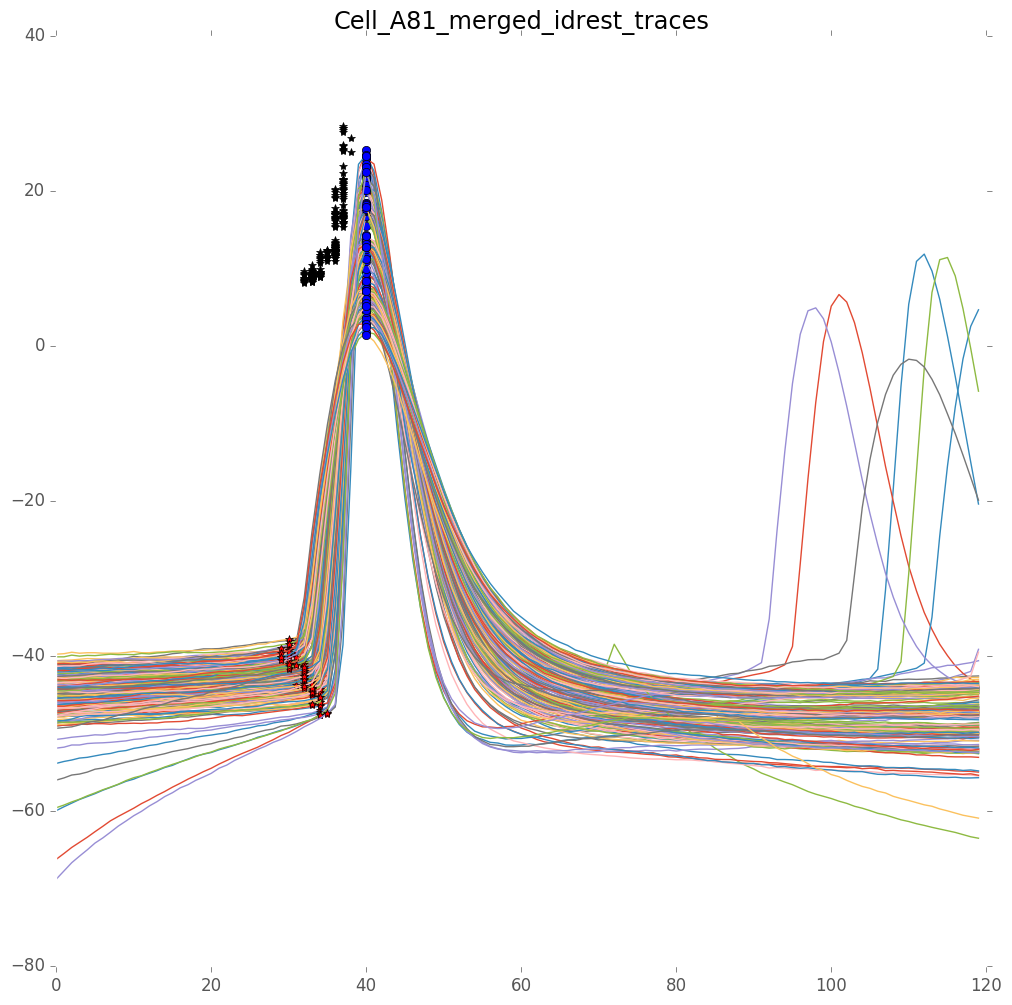

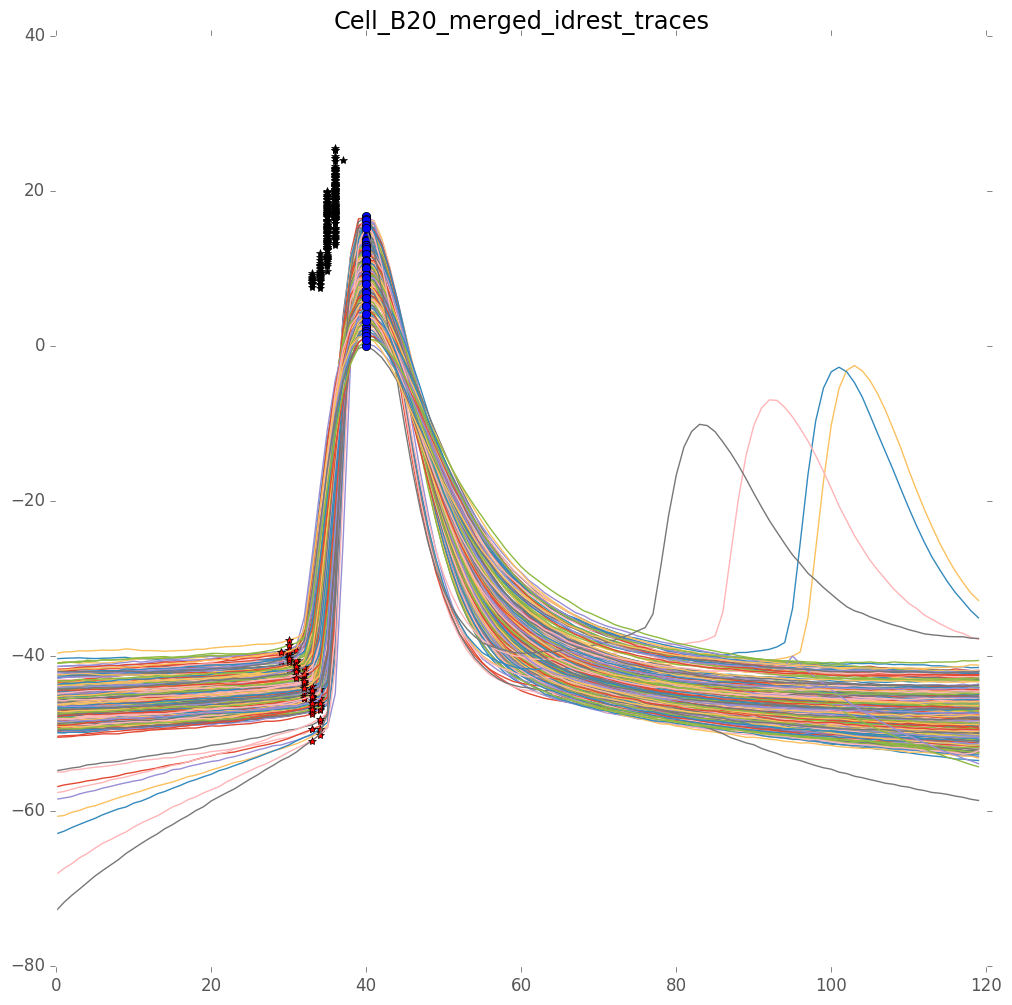

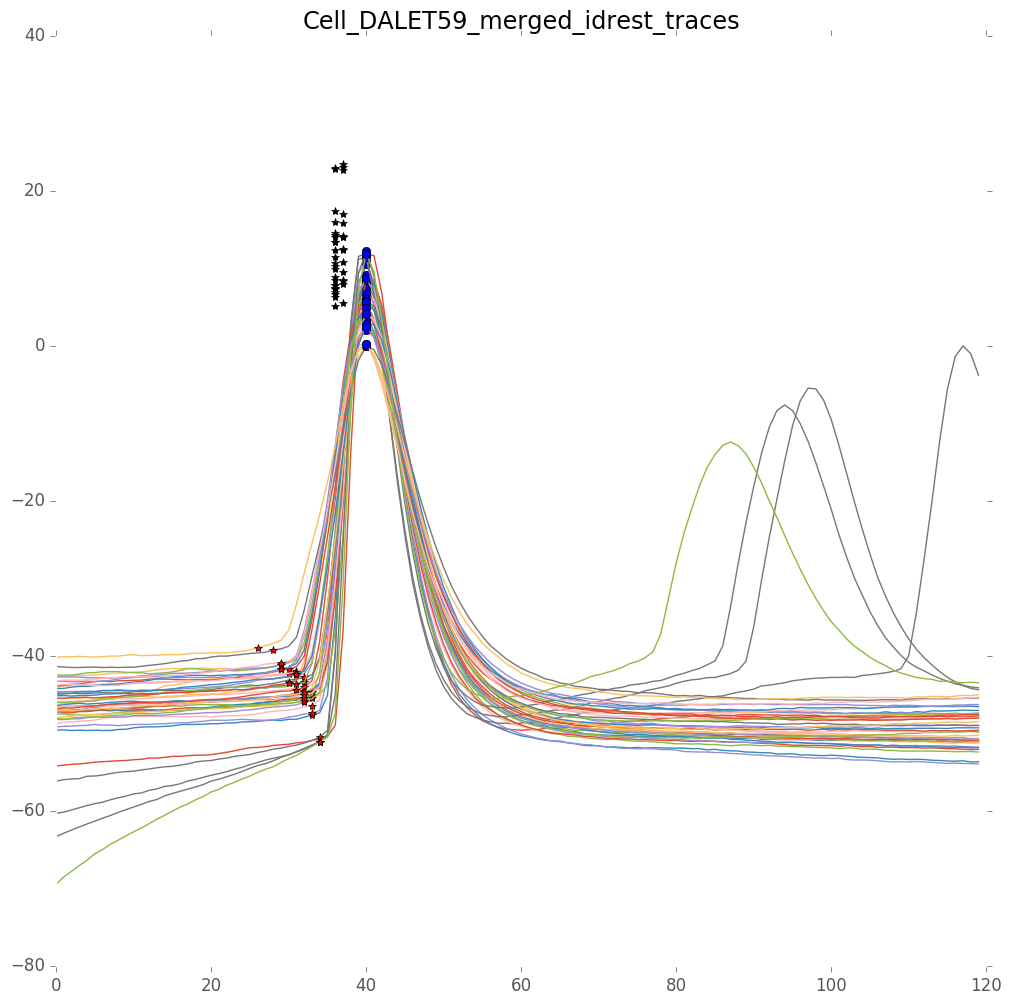

In [20]:
for expm in expms:
    tr = expm.trainingset_traces[0]
    plt.figure(figsize=(12,12))
    for i in range(tr.getSpikeNb()):
        plt.plot(tr.spike_waveforms[i,:], label='V')
        spike_diff = np.diff(tr.spike_waveforms[i,:])
        #plt.plot(spike_diff, label='dV')
        plt.plot(tr.relative_threshold_times[i], tr.threshold_values[i],'*r')
        #peak_time = tr.peaks_t[i]-(tr.spks[i]-40)
        plt.plot(tr.relative_peak_times[i], tr.spike_waveforms[i,tr.relative_peak_times[i]], 'ob')
        plt.plot(tr.relative_max_dV_times[i], tr.max_dV_values[i], '*k')
        plt.title(expm.name)
#plt.legend()
#plt.xlim([5,45])
#plt.ylim([-60,-30])
plt.show()

In [27]:
lifs = []
for expm in expms:
    
    # Create a new object GIF 
    myLIF = LIF(expm.dt)
    
    # Define parameters
    myLIF.Tref = 5.0  
    
    # detect Spikes
    expm.detectSpikes_cython()
    
    # Perform the fit
    myLIF.fit(expm, DT_beforeSpike=5.0)
    lifs.append(myLIF)

Detect spikes!
Done!
Detect spikes!
Done!
Detect spikes!
Done!
Detect spikes!
Done!
Detect spikes!
Done!
Detect spikes!
Done!
Detect spikes!
Done!
Detect spikes!
Done!
Detect spikes!
Done!
Detect spikes!
Done!
Detect spikes!
Done!
Detect spikes!
Done!


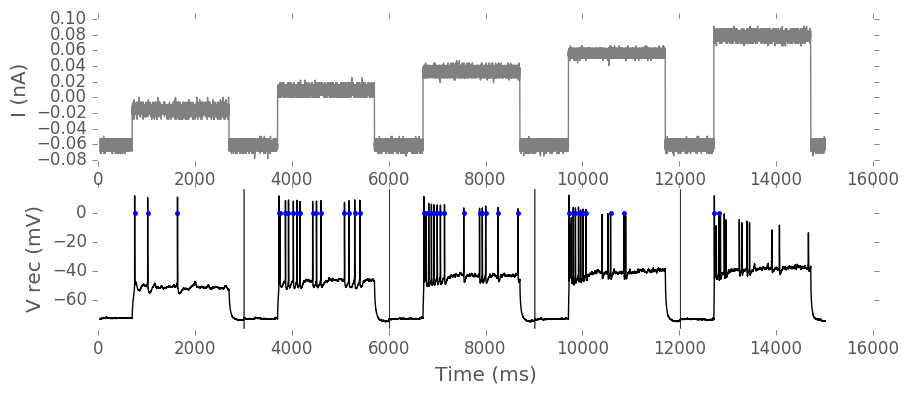

In [33]:
tr.plot()

In [28]:
a = lifs[0]

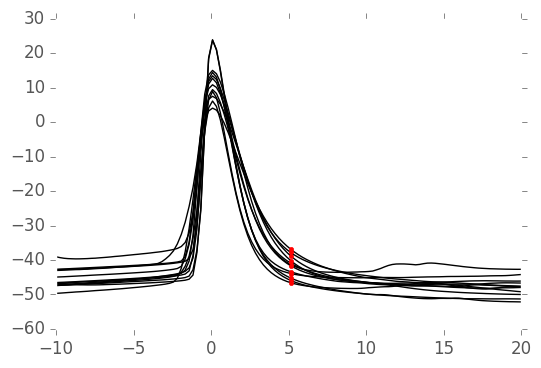

In [29]:
plt.figure()
for a in lifs:    
    plt.plot(a.avg_spike_shape_support, a.avg_spike_shape, 'black')
    Tref_ind = np.where(a.avg_spike_shape_support >= a.Tref)[0][0]
    plt.plot([a.avg_spike_shape_support[Tref_ind]], [a.Vr], '.', color='red')
plt.show()

In [30]:
params_dict = {}
params_dict['taus'] = np.array([lif.C/lif.gl for lif in lifs])
params_dict['Rs'] = np.array([1/lif.gl for lif in lifs])
params_dict['Cs'] = np.array([lif.C for lif in lifs])
params_dict['Els'] = np.array([lif.El for lif in lifs])
params_dict['Vrs'] = np.array([lif.Vr for lif in lifs])
params_dict['Vt'] = np.array([lif.Vt for lif in lifs])

import pandas as pd
df = pd.DataFrame(params_dict)

In [31]:
df.describe(percentiles=[])

Cs        Els          Rs        Vrs         Vt        taus
count  12.000000  12.000000   12.000000  12.000000  12.000000   12.000000
mean    0.441599 -62.216311  219.557184 -41.888619 -42.776115   87.056778
std     0.236307   4.307073  104.050884   3.185645   2.875921   51.313419
min     0.106811 -68.160750   91.154189 -46.586267 -46.581060   28.747003
50%     0.450107 -62.637123  213.947001 -41.498489 -43.605070   71.557733
max     0.919976 -54.340959  434.989757 -36.870459 -36.343539  203.024942

In [32]:
df

Cs        Els          Rs        Vrs         Vt        taus
0   0.393396 -61.819962   91.154189 -38.815814 -40.438938   35.859699
1   0.292113 -59.216454  228.438349 -41.336263 -36.343539   66.729718
2   0.475335 -59.362437  314.024277 -40.894423 -43.283351  149.266606
3   0.106811 -65.474548  331.360293 -36.870459 -46.581060   35.392930
4   0.466735 -56.419532  434.989757 -43.928559 -40.419433  203.024942
5   0.919976 -63.434094  106.763901 -43.413506 -45.712257   98.220191
6   0.537335 -63.292584  207.432879 -45.935453 -44.157567  111.461022
7   0.433480 -68.125481  139.683947 -40.165092 -40.710783   60.550158
8   0.759592 -68.160750  147.860365 -45.236589 -44.950046  112.313605
9   0.523858 -61.981663  135.735265 -41.660715 -42.336429   71.106044
10  0.130395 -64.967275  220.461123 -37.820292 -43.926789   28.747003
11  0.260167 -54.340959  276.781865 -46.586267 -44.453188   72.009422

In [19]:
a.Vt

-40.438938382028162